In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import argparse

In [20]:
df =pd.read_csv('HR_comma_sep.csv')

In [21]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
df.Department

0          sales
1          sales
2          sales
3          sales
4          sales
          ...   
14994    support
14995    support
14996    support
14997    support
14998    support
Name: Department, Length: 14999, dtype: object

In [23]:
# Check for missing values
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


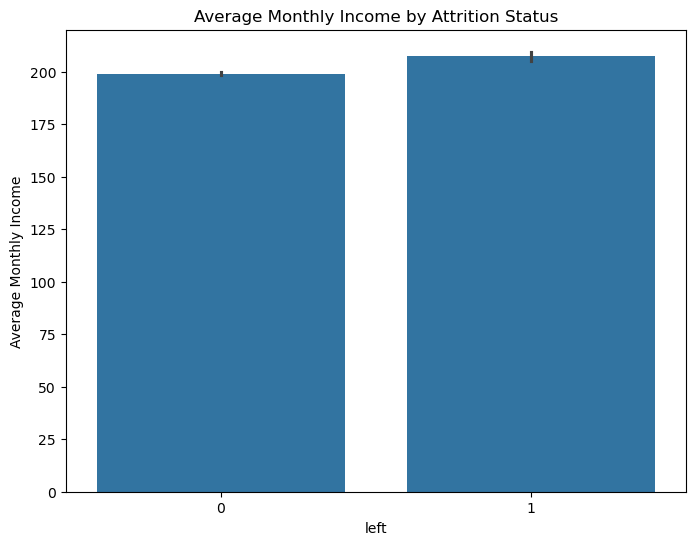

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of average MonthlyIncome by Attrition status
plt.figure(figsize=(8, 6))
sns.barplot(x='left', y='average_montly_hours', data=df)
plt.title('Average Monthly Income by Attrition Status')
plt.ylabel('Average Monthly Income')
plt.show()

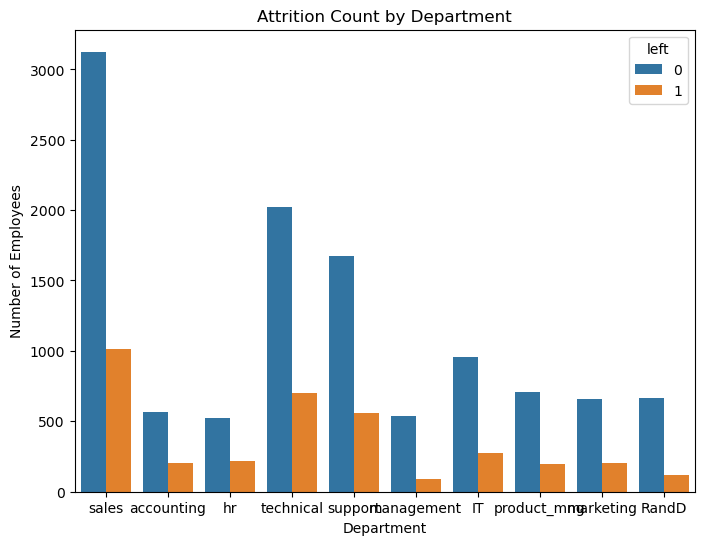

In [25]:
# Visualize the Correlation Between Department and Attrition
# Count plot of Attrition by Department
plt.figure(figsize=(8, 6))
sns.countplot(x='Department', hue='left', data=df)
plt.title('Attrition Count by Department')
plt.ylabel('Number of Employees')
plt.show()

# Build a Logistic Regression Model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                    'JobRole', 'MaritalStatus', 'OverTime']

# Ensure all columns in categorical_cols exist in the DataFrame
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

for col in existing_categorical_cols:7
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Encode target variable if it exists
if 'left' in df_encoded.columns:
    df_encoded['Attrition'] = df_encoded['left']  # Use 'left' column as the target variable
else:
    raise KeyError("The column 'left' does not exist in the DataFrame.")

# Ensure all required feature columns exist in the DataFrame
required_features = ['MonthlyIncome', 'OverTime', 'JobSatisfaction', 'EnvironmentSatisfaction',
                     'JobInvolvement', 'WorkLifeBalance', 'YearsAtCompany', 'Department']

# Check for missing columns and handle them
missing_features = [col for col in required_features if col not in df_encoded.columns]
if missing_features:
    print(f"Warning: The following required features are missing and will be filled with default values: {missing_features}")
    for col in missing_features:
        df_encoded[col] = 0  # Fill missing columns with default value (e.g., 0)

# Features and target
features = required_features
X = df_encoded[features]
y = df_encoded['Attrition']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87      2294
           1       0.00      0.00      0.00       706

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
